# Face Detection with Classifical ML (OpenCV)

In this first exercise, you will apply a basic face detection algorithm, that will later reuse.

First, load and display the image `Trump-baseball.jpg` as a numpy array.

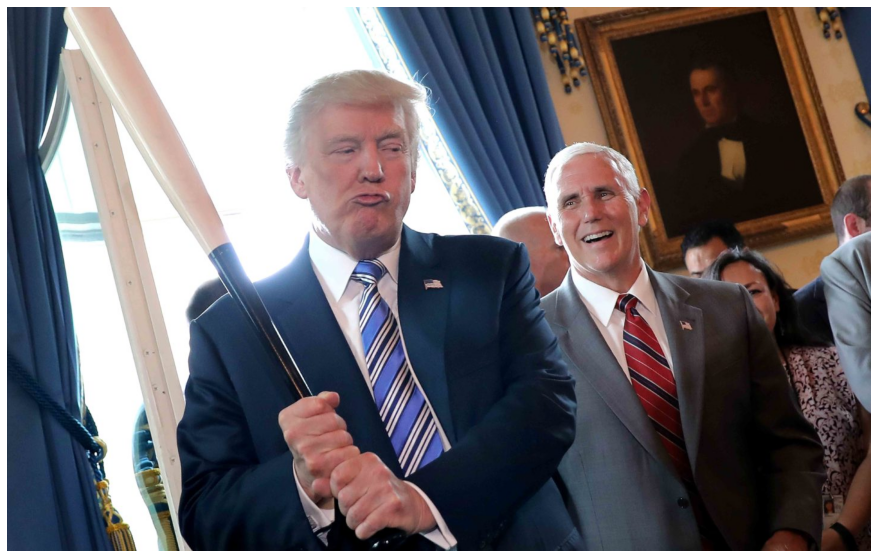

In [4]:
# TODO: load the image
%matplotlib inline
import matplotlib.pyplot as plt

trump = plt.imread("Trump-baseball.jpg")
plt.figure(figsize=(16,10))
plt.axis("off")
plt.imshow(trump);

You will now use openCV to get the faces on this image.
First install openCV (e.g. using the command `pip install opencv-python` if you are using pip).

Then find the cascade classifier xml files, in particular `haarcascade_frontalface_default.xml`. You can also download it here https://github.com/opencv/opencv/tree/master/data/haarcascades

Then import the library openCV (called `cv2`) and instantiate a `CascadeClassifier` object

In [5]:
# TODO: import openCV and instantiate a CascadeClassifier
import cv2

FACE_CASCADE_PATH = "./haarcascade_frontalface_default.xml"

# Instantiate a face cascade classifier
faceCascade = cv2.CascadeClassifier(FACE_CASCADE_PATH)

Apply the classifier to the input image using the method `detectMultiScale`

In [8]:
# TODO: Apply the classifier to your image
faces = faceCascade.detectMultiScale(trump)

Play around with the output of your classifier. What type of data is outputed? How much faces does it detect?

In [9]:
# TODO: Explore the output
print("the output is a numpy array")
print("shape of the output :",faces.shape)
print("our classifiers finds",faces.shape[0], "faces")
print("for each face, we have 4 numbers: the box location")
print(faces)

the output is a numpy array
shape of the output : (3, 4)
our classifiers finds 3 faces
for each face, we have 4 numbers: the box location
[[ 516  165  180  180]
 [ 887  256  166  166]
 [1125  113   73   73]]


Using the `rectangle` object of openCV, display the image with the bounding boxes around the faces.

NB: One can use the `matplotlib.patches.Rectangle` as well.

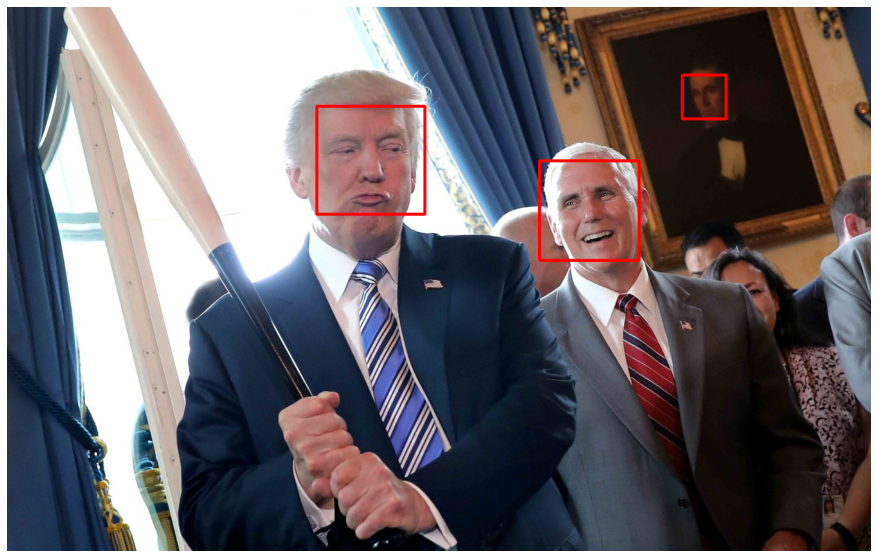

In [10]:
# TODO: display the image with bounding boxes around faces
for (x, y, w, h) in faces:
    cv2.rectangle(trump, (x,y), (x+w, y+h), (255, 0, 0), 3)

plt.figure(figsize=(16,10))
plt.axis('off')
plt.imshow(trump)

How do you feel? Is it working well?

If not, you have some hyperparameters in the method `detectMultiScale`, specifically:
- scaleFactor: bigger scale factor will make your algorithm go faster, with less accuracy. A value between 1 and 1.3 is usual.
- minNeighbors: how many neighbors each candidate box should have to retain it. High values mean better accuracy, but less detections. A value around 5 might be a good option.
- minSize: the minimun size of a box, e.g. (30,30) for a square of 30 pixels side
- maxSize: maximum size of a box

Play with those hyperparameters to get a better result.

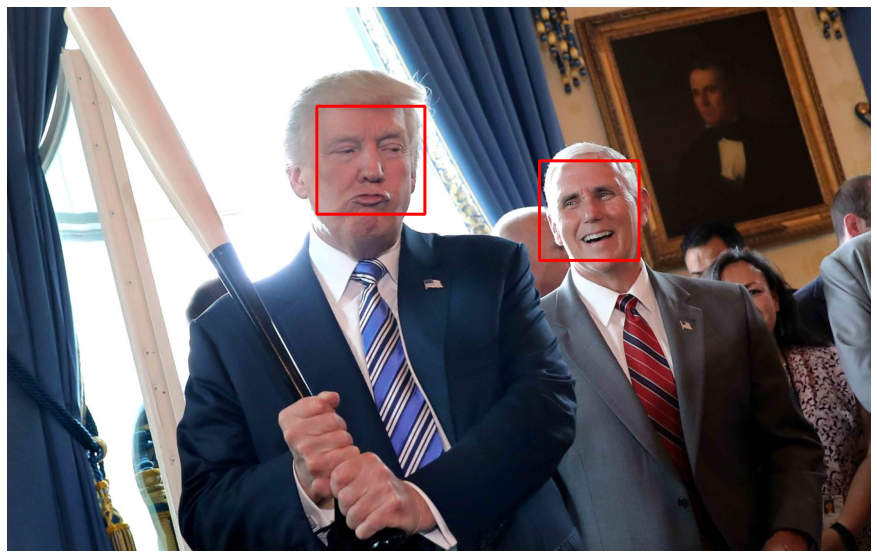

In [11]:
# TODO: Play with hyperparameters to get a better result
trump = plt.imread('Trump-baseball.jpg')

faces = faceCascade.detectMultiScale(trump, scaleFactor=1.1, minNeighbors=5, minSize=(100,100))

for (x, y, w, h) in faces:
    cv2.rectangle(trump, (x, y), (x+w, y+h), (255, 0, 0), 3)

plt.figure(figsize=(16,10))
plt.axis('off')
plt.imshow(trump)

**Optional**: Detect your face on your webcam!

To do so, you can use the `VideoCapture` of openCV. More specifically, you have to do the following:
```Python
video_capture = cv2.VideoCapture(0)
```

This will instantiate an object that will allow you to get your camera input.

Then, in a `while` loop, you can just do:
```Python
ret, frame = video_capture.read()
```

The variable `frame` will contain then an image as a numpy array (just like using `plt.imread`). You can then do the face detection and display the result.

Do not forget to put a break into your `while` loop.
For example, if you use the following code, your video will stop when you press the `Q` keyboard.
```Python
if cv2.waitKey(1) & 0xFF == ord('q'):
    break
```



Webcam is broken so I couldn't attempt the below code

In [10]:
# TODO: use face detection on your webcam
# Instantiate a face cascade classifier
faceCascade = ...

video_capture = ...

while True:
    # Capture frame-by-frame
    ret, frame = ...

    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade...(frame,scaleFactor=1.1,minNeighbors=5,minSize=(30, 30))

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Display the resulting frame
    cv2...

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()

If you want even more, be aware that you can detect the eyes and the mouth using the same method. All you have to do is use the right XML file when instantiating your `CascadeClassifier`.